In [2]:
import os
import yaml
import pandas as pd

# Path to the YAML folder
input_folder = "D:/guvi/stock_analysis/yaml folder"

# Create an output folder for CSV files
output_folder = "D:/guvi/stock_analysis/csv_output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Dictionary to store DataFrames by symbol
symbol_dataframes = {}

# Check if the folder exists and has files
if not os.path.exists(input_folder):
    print(f"Input folder '{input_folder}' does not exist.")
else:
    print(f"Found input folder: {input_folder}")

# Walk through the folder and subfolders to find YAML files
for root, dirs, files in os.walk(input_folder):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        print(f"Checking file: {file_name}")

        if file_name.endswith('.yaml') or file_name.endswith('.yml'):
            print(f"Processing YAML file: {file_name}")
            
            # Load the YAML file
            try:
                with open(file_path, 'r') as file:
                    data = yaml.safe_load(file)
                    print(f"Loaded {len(data)} entries from {file_name}")

                    # Process each entry in the YAML file
                    for entry in data:
                        symbol = entry['Ticker']
                        entry.pop('Ticker')  # Remove the symbol from the entry

                        # Convert the entry into a DataFrame
                        entry_df = pd.DataFrame([entry])

                        # Append the entry data to the corresponding symbol's DataFrame
                        if symbol not in symbol_dataframes:
                            symbol_dataframes[symbol] = entry_df
                        else:
                            symbol_dataframes[symbol] = pd.concat([symbol_dataframes[symbol], entry_df], ignore_index=True)

            except Exception as e:
                print(f"Error reading {file_name}: {e}")

# Debugging: Check how many symbols and data frames have been processed
print(f"Number of symbols processed: {len(symbol_dataframes)}")

# Save each symbol's DataFrame as a CSV
for symbol, df in symbol_dataframes.items():
    output_file = os.path.join(output_folder, f"{symbol}.csv")
    df.to_csv(output_file, index=False)
    print(f"Saved {symbol} data to CSV")

print("Data extraction and CSV generation completed.")


Found input folder: D:/guvi/stock_analysis/yaml folder
Checking file: symbol.ipynb
Checking file: 2023-10-03_05-30-00.yaml
Processing YAML file: 2023-10-03_05-30-00.yaml
Loaded 50 entries from 2023-10-03_05-30-00.yaml
Checking file: 2023-10-04_05-30-00.yaml
Processing YAML file: 2023-10-04_05-30-00.yaml
Loaded 50 entries from 2023-10-04_05-30-00.yaml
Checking file: 2023-10-05_05-30-00.yaml
Processing YAML file: 2023-10-05_05-30-00.yaml
Loaded 50 entries from 2023-10-05_05-30-00.yaml
Checking file: 2023-10-06_05-30-00.yaml
Processing YAML file: 2023-10-06_05-30-00.yaml
Loaded 50 entries from 2023-10-06_05-30-00.yaml
Checking file: 2023-10-09_05-30-00.yaml
Processing YAML file: 2023-10-09_05-30-00.yaml
Loaded 50 entries from 2023-10-09_05-30-00.yaml
Checking file: 2023-10-10_05-30-00.yaml
Processing YAML file: 2023-10-10_05-30-00.yaml
Loaded 50 entries from 2023-10-10_05-30-00.yaml
Checking file: 2023-10-11_05-30-00.yaml
Processing YAML file: 2023-10-11_05-30-00.yaml
Loaded 50 entries fr

In [7]:
import os
import pandas as pd

# Define input and output folder paths
input_folder = r'D:\guvi\stock_analysis\csv_output'
output_folder = r'D:\guvi\stock_analysis\cleaned_csv_output'

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all CSV files in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_folder, file_name)

        # Read CSV
        df = pd.read_csv(file_path)

        # Step 1: Convert 'date' column to datetime
        df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Invalid dates become NaT

        # Step 2: Fill missing values with column means
        missing_values = df.isnull().sum()
        if missing_values.any():
            print(f"Missing values found in {file_name}:")
            print(missing_values)
            df.fillna(df.mean(numeric_only=True), inplace=True)

        # Step 3: Convert 'volume' to integer (after filling NaNs)
        df['volume'] = df['volume'].astype(int)

        # Step 4: Remove duplicate rows
        df = df.drop_duplicates()

        # Step 5: Add a 'month' column from the 'date'
        df['month'] = df['date'].dt.to_period('M')

        # Step 6: Format 'date' to only include date (no time), as string
        df['date'] = df['date'].dt.strftime('%Y-%m-%d')

        # Step 7: Save cleaned file
        output_file_path = os.path.join(output_folder, file_name)
        df.to_csv(output_file_path, index=False)

        print(f"✅ Cleaned data saved for {file_name} at {output_file_path}")

print("🎉 Data cleaning completed for all symbol files.")



✅ Cleaned data saved for ADANIENT.csv at D:\guvi\stock_analysis\cleaned_csv_output\ADANIENT.csv
✅ Cleaned data saved for ADANIPORTS.csv at D:\guvi\stock_analysis\cleaned_csv_output\ADANIPORTS.csv
✅ Cleaned data saved for APOLLOHOSP.csv at D:\guvi\stock_analysis\cleaned_csv_output\APOLLOHOSP.csv
✅ Cleaned data saved for ASIANPAINT.csv at D:\guvi\stock_analysis\cleaned_csv_output\ASIANPAINT.csv
✅ Cleaned data saved for AXISBANK.csv at D:\guvi\stock_analysis\cleaned_csv_output\AXISBANK.csv
✅ Cleaned data saved for BAJAJ-AUTO.csv at D:\guvi\stock_analysis\cleaned_csv_output\BAJAJ-AUTO.csv
✅ Cleaned data saved for BAJAJFINSV.csv at D:\guvi\stock_analysis\cleaned_csv_output\BAJAJFINSV.csv
✅ Cleaned data saved for BAJFINANCE.csv at D:\guvi\stock_analysis\cleaned_csv_output\BAJFINANCE.csv
✅ Cleaned data saved for BEL.csv at D:\guvi\stock_analysis\cleaned_csv_output\BEL.csv
✅ Cleaned data saved for BHARTIARTL.csv at D:\guvi\stock_analysis\cleaned_csv_output\BHARTIARTL.csv
✅ Cleaned data saved f

In [16]:
import os
import pandas as pd

# Specify the folder where your symbol-wise CSV files are stored
folder_path = 'D:\guvi\stock_analysis\cleaned_csv_output'

# Create an empty list to store data for analysis
symbol_data = []

# Loop through all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Extract the symbol from the filename (assuming the filename is the ticker symbol)
        symbol = os.path.splitext(file_name)[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Ensure 'date' column is in datetime format
        df['date'] = pd.to_datetime(df['date'])
        
        # Sort data by date to get the first and last close prices for yearly return calculation
        df = df.sort_values(by='date')

        # Get the first and last close price for the year
        first_close = df['close'].iloc[0]
        last_close = df['close'].iloc[-1]

        # Calculate the yearly return
        yearly_return = ((last_close - first_close) / first_close) * 100
        
        # Add the symbol and metrics to the list
        symbol_data.append({
            'symbol': symbol,
            'yearly_return': yearly_return,
            'green_or_red': 'green' if yearly_return > 0 else 'red'
        })

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(symbol_data)

# Sort stocks based on their yearly return and get the top 10 green stocks
top_10_green_stocks = metrics_df[metrics_df['green_or_red'] == 'green'].nlargest(10, 'yearly_return')

# Sort stocks based on their yearly return and get the top 10 loss stocks (bottom 10)
top_10_loss_stocks = metrics_df[metrics_df['green_or_red'] == 'red'].nsmallest(10, 'yearly_return')

# Market Summary:
# Calculate the overall number of green vs. red stocks
green_stocks_count = metrics_df[metrics_df['green_or_red'] == 'green'].shape[0]
red_stocks_count = metrics_df[metrics_df['green_or_red'] == 'red'].shape[0]

# Calculate the average price across all stocks
average_price = metrics_df['yearly_return'].mean()

# Calculate the average volume across all stocks (we'll use a placeholder as volume isn't in the metrics dataframe)
# For this, we need to load and compute volume from the CSV files individually, or you can add it to your symbol_data list.
average_volume = 0  # Placeholder: you should calculate this if you have volume data.

# Print the results
print("Top 10 Green Stocks:")
print(top_10_green_stocks)
print("\nTop 10 Loss Stocks:")
print(top_10_loss_stocks)

print("\nMarket Summary:")
print(f"Green Stocks: {green_stocks_count}")
print(f"Red Stocks: {red_stocks_count}")
print(f"Average Yearly Return: {average_price:.2f}%")
print(f"Average Volume: {average_volume}")


Top 10 Green Stocks:
        symbol  yearly_return green_or_red
47       TRENT     223.092613        green
8          BEL     101.760057        green
30         M&M      95.976974        green
5   BAJAJ-AUTO      89.011153        green
9   BHARTIARTL      69.599049        green
35   POWERGRID      68.854924        green
10        BPCL      67.477150        green
20  HEROMOTOCO      58.976655        green
40   SUNPHARMA      57.282404        green
17     HCLTECH      53.257447        green

Top 10 Loss Stocks:
        symbol  yearly_return green_or_red
24  INDUSINDBK     -30.458409          red
3   ASIANPAINT     -21.935046          red
7   BAJFINANCE     -16.110874          red
0     ADANIENT      -6.670856          red
22  HINDUNILVR      -0.957916          red

Market Summary:
Green Stocks: 45
Red Stocks: 5
Average Yearly Return: 32.85%
Average Volume: 0


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


here am combining all the 50 csv file into single csv file and performing visualization part

In [6]:
import os
import pandas as pd

folder_path = r'D:\guvi\stock_analysis\cleaned_csv_output'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

combined_df = pd.DataFrame()

for file in all_files:
    df = pd.read_csv(file)
    if df.empty or 'date' not in df.columns or 'close' not in df.columns:
        continue
    symbol = os.path.splitext(os.path.basename(file))[0]
    df['symbol'] = symbol
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df = combined_df.sort_values(['symbol', 'date'])


In [7]:
metrics = []

for symbol, group in combined_df.groupby('symbol'):
    group = group.sort_values('date')
    if group.empty or group.shape[0] < 2:
        continue
    first_close = group.iloc[0]['close']
    last_close = group.iloc[-1]['close']
    yearly_return = ((last_close - first_close) / first_close) * 100
    avg_price = group['close'].mean()
    avg_volume = group['volume'].mean()

    metrics.append({
        'symbol': symbol,
        'yearly_return': yearly_return,
        'average_price': avg_price,
        'average_volume': avg_volume,
        'green_or_red': 'green' if yearly_return > 0 else 'red'
    })

metrics_df = pd.DataFrame(metrics)


In [8]:
# Top 10 Green Stocks
top_green = metrics_df[metrics_df['green_or_red'] == 'green'].sort_values(by='yearly_return', ascending=False).head(10)

# Top 10 Loss Stocks
top_red = metrics_df[metrics_df['green_or_red'] == 'red'].sort_values(by='yearly_return').head(10)

# Market Summary
green_count = (metrics_df['green_or_red'] == 'green').sum()
red_count = (metrics_df['green_or_red'] == 'red').sum()
avg_price_all = metrics_df['average_price'].mean()
avg_volume_all = metrics_df['average_volume'].mean()


C:\Users\vicky\AppData\Local\Temp\ipykernel_7544\2091013621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yearly_return', y='symbol', data=top_green, palette='Greens_r')


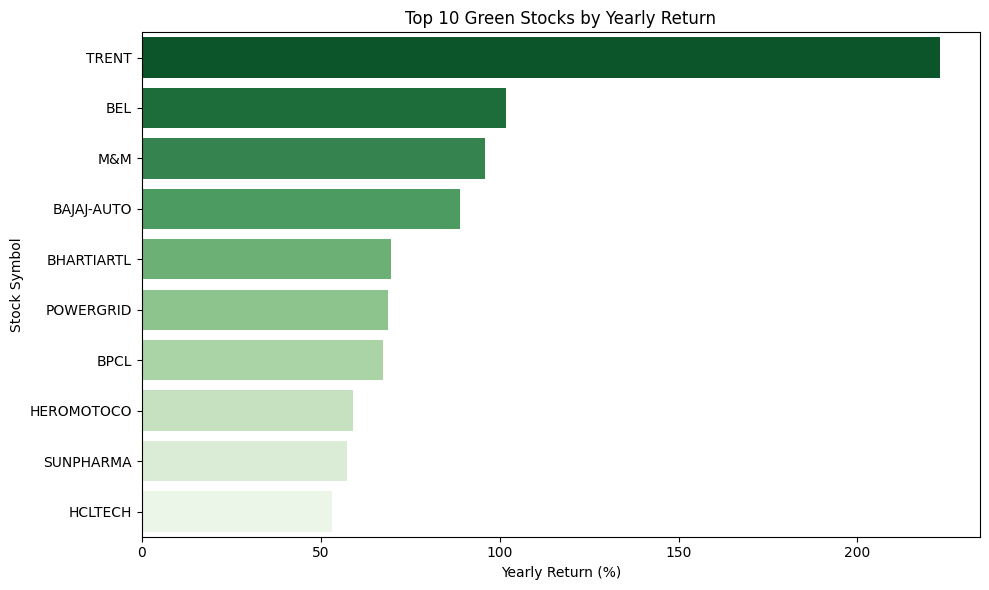

C:\Users\vicky\AppData\Local\Temp\ipykernel_7544\2091013621.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yearly_return', y='symbol', data=top_red, palette='Reds')


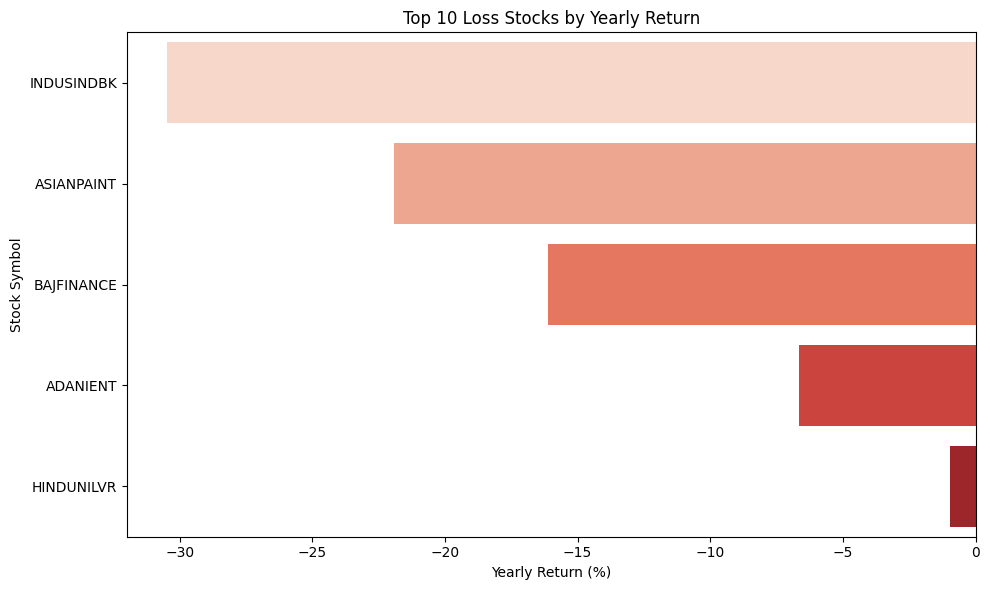

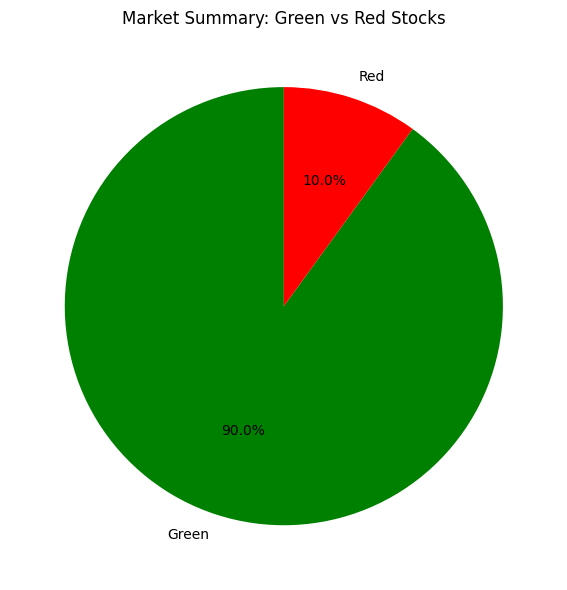

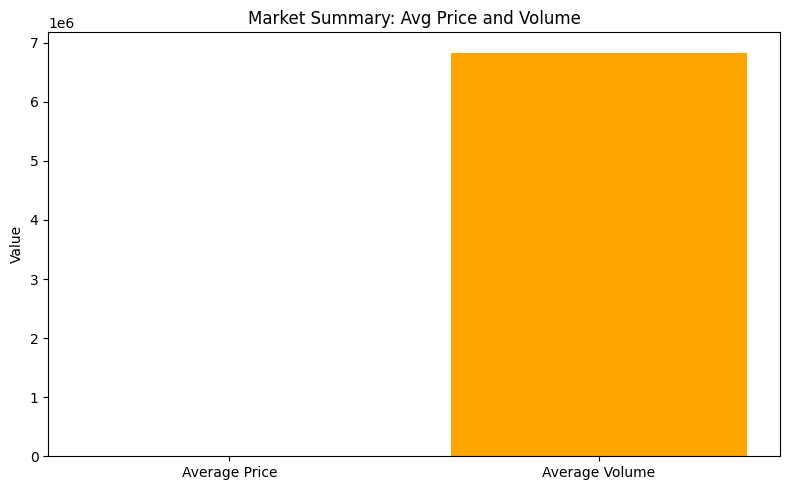

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 Green Stocks
plt.figure(figsize=(10, 6))
sns.barplot(x='yearly_return', y='symbol', data=top_green, palette='Greens_r')
plt.title('Top 10 Green Stocks by Yearly Return')
plt.xlabel('Yearly Return (%)')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()

# 2. Top 10 Loss Stocks
plt.figure(figsize=(10, 6))
sns.barplot(x='yearly_return', y='symbol', data=top_red, palette='Reds')
plt.title('Top 10 Loss Stocks by Yearly Return')
plt.xlabel('Yearly Return (%)')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()

# 3. Green vs Red Stocks Pie Chart
plt.figure(figsize=(6, 6))
plt.pie([green_count, red_count], labels=['Green', 'Red'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Market Summary: Green vs Red Stocks')
plt.tight_layout()
plt.show()

# 4. Avg Return & Volume
plt.figure(figsize=(8, 5))
plt.bar(['Average Price', 'Average Volume'], [avg_price_all, avg_volume_all], color=['skyblue', 'orange'])
plt.title('Market Summary: Avg Price and Volume')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [10]:
metrics_df.to_csv('D:/guvi/stock_analysis/stock_metrics_summary.csv', index=False)
